In [12]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [13]:
def len_data(filename):
    anger_data = os.listdir(filename+'/anger')
    happy_data = os.listdir(filename+'/happy')
    sadness_data = os.listdir(filename+'/sadness')
    surprise_data = os.listdir(filename+'/surprise')

    value = []
    for data in [anger_data,happy_data,sadness_data,surprise_data]:
        value.append(len(data))
        
    return sum(value)

In [14]:
filename = 'CK+48'
print('Total Images in set : ' + str(len_data(filename)))

Total Images in set : 927


In [22]:
import cv2

def load_images_from_folder(folder):
    images = []
    
    folder1 = folder + '\\anger'
    for filename in os.listdir(folder1)[:20]:
        img = cv2.imread(os.path.join(os.getcwd(),folder1,filename))
        if img is not None:
            images.append(img)
            
    folder4 = folder + '\\happy'
    for filename in os.listdir(folder4)[:20]:
        img = cv2.imread(os.path.join(os.getcwd(),folder4,filename))
        if img is not None:
            images.append(img)
            
    folder5 = folder + '\\sadness'
    for filename in os.listdir(folder5)[:20]:
        img = cv2.imread(os.path.join(os.getcwd(),folder5,filename))
        if img is not None:
            images.append(img)
    
    folder6 = folder + '\\surprise'
    for filename in os.listdir(folder6)[:20]:
        img = cv2.imread(os.path.join(os.getcwd(),folder6,filename))
        if img is not None:
            images.append(img)
    return images

In [23]:
images = load_images_from_folder('CK+48')

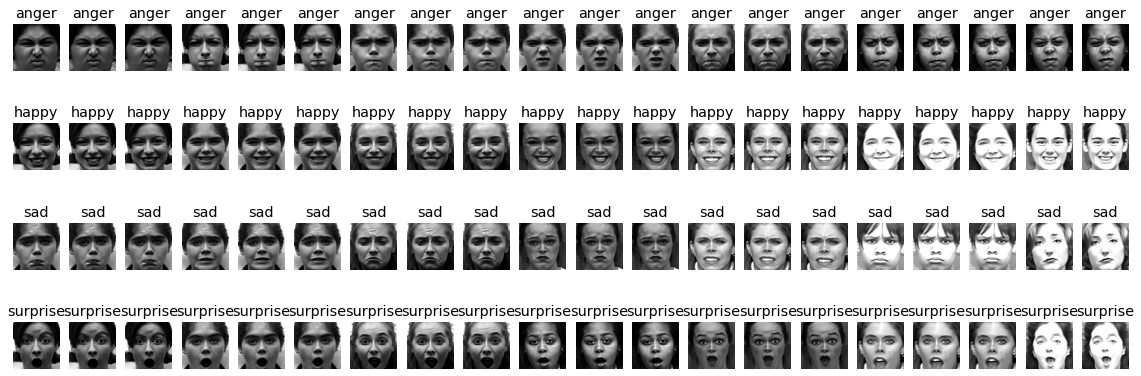

In [27]:
fig, axis = plt.subplots(4,20,figsize=(20,7))
count = 0
for i in range(0,4):
    for j in range(0,20):
        img_rgb = cv2.cvtColor(images[count], cv2.COLOR_BGR2RGB)
        axis[i,j].imshow(img_rgb)
        axis[i,j].axis('off')
        count = count + 1
        if i==0:
            axis[i,j].set_title('anger')
        elif i==1:
            axis[i,j].set_title('happy')
        elif i==2:
            axis[i,j].set_title('sad')
        else:
            axis[i,j].set_title('surprise')


In [29]:
def plot_data(filename):
    buildings_data = os.listdir(filename+'/anger')
    mountain_data = os.listdir(filename+'/happy')
    sea_data = os.listdir(filename+'/sadness')
    street_data = os.listdir(filename+'/surprise')

    value = []
    for data in [buildings_data,mountain_data,sea_data,street_data]:
        value.append(len(data))
    
    sns.barplot(['angry','happy','sad','surprise'],value, palette = 'plasma')


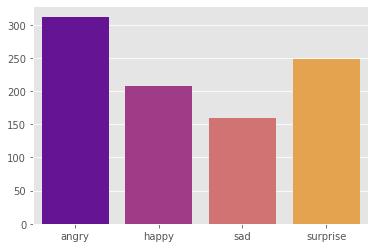

In [30]:
filename = 'CK+48'
plot_data(filename)

In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [26]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     zoom_range=0.2,
#     shear_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
    )

In [27]:
TRAINING_DIR = 'CK+48'
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    class_mode='categorical',
                                                    target_size=(48, 48))

Found 927 images belonging to 4 classes.


In [28]:
class FinalCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc') > 0.99):
            print('\nReached above accuracy of 0.99 so training is stopped')
            self.model.stop_training=True
callbacks = FinalCallback()

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu',padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dense(4, activation='softmax')
])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 46, 46, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 23, 23, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 23, 23, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 128)      

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [32]:
history = model.fit_generator(train_generator,
                              epochs=40,
                              verbose=1,callbacks = [callbacks])

Epoch 1/40
29/29 [==============================] - 6s 215ms/step - loss: 1.3705 - acc: 0.3172
Epoch 2/40
29/29 [==============================] - 6s 218ms/step - loss: 1.0441 - acc: 0.5653
Epoch 3/40
29/29 [==============================] - 7s 232ms/step - loss: 0.6793 - acc: 0.7141
Epoch 4/40
29/29 [==============================] - 6s 201ms/step - loss: 0.4290 - acc: 0.8328
Epoch 5/40
29/29 [==============================] - 7s 229ms/step - loss: 0.3363 - acc: 0.8662
Epoch 6/40
29/29 [==============================] - 6s 224ms/step - loss: 0.2360 - acc: 0.9105
Epoch 7/40
29/29 [==============================] - 7s 225ms/step - loss: 0.1853 - acc: 0.9256
Epoch 8/40
29/29 [==============================] - 6s 224ms/step - loss: 0.1142 - acc: 0.9622
Epoch 9/40
29/29 [==============================] - 7s 225ms/step - loss: 0.0878 - acc: 0.9666
Epoch 10/40
29/29 [==============================] - 6s 224ms/step - loss: 0.1364 - acc: 0.9493
Epoch 11/40
29/29 [==============================

In [33]:
model.save('CKmodel.h5')

In [1]:
import tensorflow as tf

In [2]:
model_pred = tf.keras.models.load_model('CKmodel.h5')

In [3]:
model_pred.compile(loss='categorical_crossentropy',
             optimizer='adam',
                metrics=['accuracy'])

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [6]:
exp = ['Angry','Happy','Sad','Surprise']
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
age_list = ['(0 - 2)', '(4 - 6)', '(8 - 12)', '(15 - 20)', '(25 - 32)', '(38 - 43)', '(48 - 53)', '(60 - 100)']
gender_list = ['Male', 'Female']

In [7]:
def load_caffe_models():
    age_net = cv2.dnn.readNetFromCaffe('deploy_age.prototxt', 'age_net.caffemodel')
    gender_net = cv2.dnn.readNetFromCaffe('deploy_gender.prototxt', 'gender_net.caffemodel')
    return(age_net, gender_net)

In [8]:
age_net , gender_net = load_caffe_models()

In [147]:
def detect_face(img):
    flag = False
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img) 
    
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 2)
        crop_img = face_img[y:y+h,x:x+w]
        flag = True
        crop = crop_img.copy()
        crop = cv2.resize(crop,(48,48))
        crop = crop.reshape(1,48,48,3)
        crop = crop.astype('float64')
        pred = model_pred.predict(crop)
        
        n1 = int(np.random.randint(0,256,1))
        n2 = int(np.random.randint(0,256,1))
        n3 = int(np.random.randint(0,256,1))

        text = exp[pred.argmax()]
        cv2.putText(face_img,text,(x,y-30),fontFace = cv2.FONT_ITALIC,
                        fontScale = 2,color=[n1,n2,n3],thickness=7) 
        
        
        crop_img = cv2.resize(crop_img,(227,227))
        blob = cv2.dnn.blobFromImage(crop_img, 1, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
        
        age_net.setInput(blob)
        age_preds = age_net.forward()
        age = age_list[age_preds[0].argmax()]
        text = 'Age : ' + age
        cv2.putText(face_img,text,(x-20,y+h+50),fontFace = cv2.FONT_HERSHEY_SIMPLEX,
                    fontScale = 1,color=[0,220,0],thickness=3)
        
        gender_net.setInput(blob)
        gender_preds = gender_net.forward()
        gender = gender_list[gender_preds[0].argmax()]
        text = 'Gender : '+ gender
        cv2.putText(face_img,text,(x+w+2,y+int(h/2)+20),fontFace = cv2.FONT_ITALIC,
                    fontScale = 1,color=[0,0,255],thickness=3)

    if(flag):
        return face_img
    else:
        return face_img
    

In [182]:
cap = cv2.VideoCapture(0) 

In [183]:
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

writer = cv2.VideoWriter('video_out.mp4', cv2.VideoWriter_fourcc(*'XVID'),12, (width, height))

In [184]:
while True: 
    
    ret, frame = cap.read() 
    
    frame = detect_face(frame)
    
    writer.write(frame)

    cv2.imshow('Video Face Detection', frame) 
 
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break 
        
cap.release() 
writer.release()
cv2.destroyAllWindows()